In [56]:
#useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [57]:
#load dataset
df = pd.read_excel("pokemon.xlsx")
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


##### Draw plots to demonstrate the analysis for the following questions for better visualizations

##### ● Get all Pokemons whose spawn rate is less than 5%

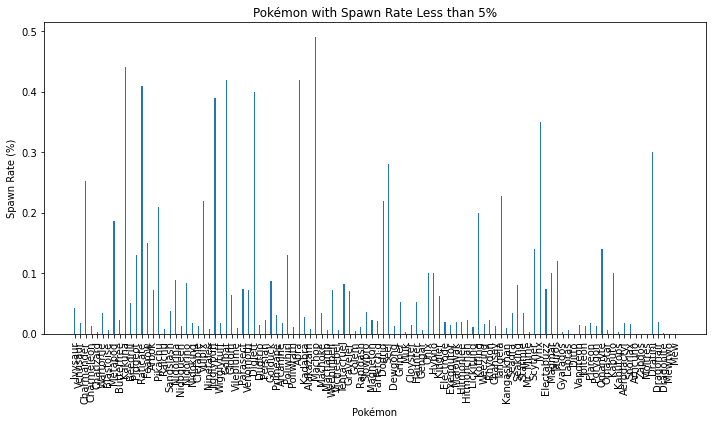

In [58]:
#filter data where spwan_chance less than 5%
filter_data = df[df['spawn_chance']<0.50]
# Plotting the spawn rates
plt.figure(figsize=(10, 6))
plt.bar(filter_data["name"], filter_data["spawn_chance"],width=0.2)
plt.xlabel("Pokémon")
plt.ylabel("Spawn Rate (%)")
plt.title("Pokémon with Spawn Rate Less than 5%")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### ● Get all Pokemons that have less than 4 weaknesses


In [59]:
#filter  weakness column
weakness = list(df['weaknesses'])
no_of_weakness = []
for weak_list in weakness:
    type = weak_list[1:-2]
    pokemon_weakness = type.split(",")
    no_of_weakness.append(len(pokemon_weakness))

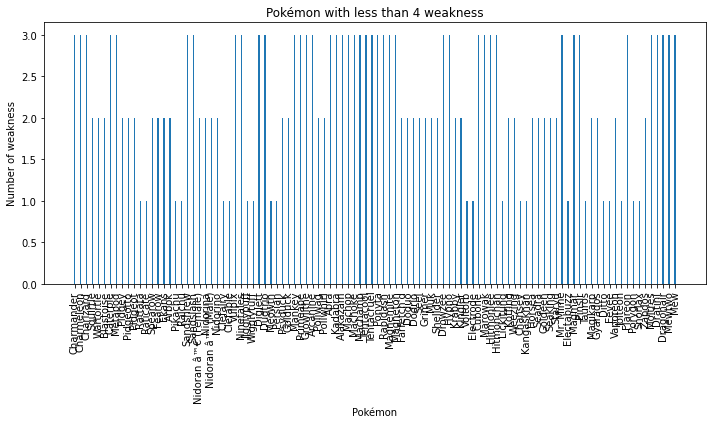

In [60]:
#add column that a particualr pokemon had weaknesses
df['no_of_weakness']=no_of_weakness

#filter data whose weakness less than 4
filter_weakness = df[df['no_of_weakness']<4]
# Plotting the graph based on weknesses
plt.figure(figsize=(10, 6))
plt.bar(filter_weakness["name"], filter_weakness["no_of_weakness"],width=0.2)
plt.xlabel("Pokémon")
plt.ylabel("Number of weakness")
plt.title("Pokémon with less than 4 weakness")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### ● Get all Pokemons that have no multipliers at all

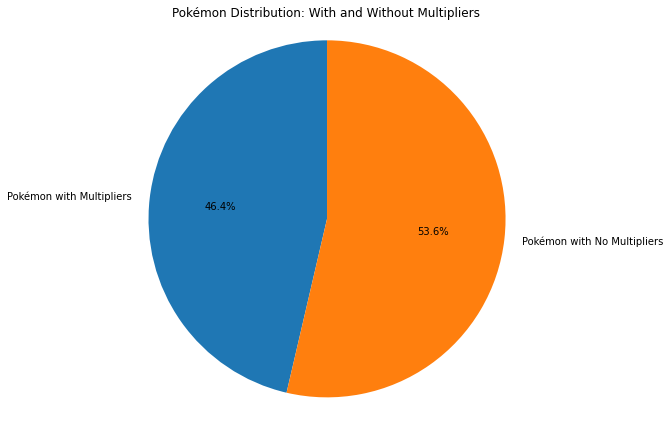

In [61]:
#filter data where there is no multipliers
nan_multipliers = df[df['multipliers'].isnull()]

# Count the number of Pokémon with no multipliers
pokemon_count = len(nan_multipliers)

# Calculate the number of Pokémon with multipliers
total_pokemon_count = len(df)
pokemon_with_multipliers_count = total_pokemon_count - pokemon_count

# Plotting the distribution of Pokémon
labels = ["Pokémon with Multipliers", "Pokémon with No Multipliers"]
sizes = [pokemon_with_multipliers_count, pokemon_count]
colors = ["lightblue", "lightcoral"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels,  autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Pokémon Distribution: With and Without Multipliers")
plt.tight_layout()
plt.show()


#### ● Get all Pokemons that do not have more than 2 evolutions

In [78]:
df['next_evolution']


0      [{'num': '002', 'name': 'Ivysaur'}, {'num': '0...
1                   [{'num': '003', 'name': 'Venusaur'}]
2                                                    NaN
3      [{'num': '005', 'name': 'Charmeleon'}, {'num':...
4                  [{'num': '006', 'name': 'Charizard'}]
                             ...                        
146    [{'num': '148', 'name': 'Dragonair'}, {'num': ...
147                [{'num': '149', 'name': 'Dragonite'}]
148                                                  NaN
149                                                  NaN
150                                                  NaN
Name: next_evolution, Length: 151, dtype: object

#### ● Get all Pokemons whose spawn time is less than 300 seconds.


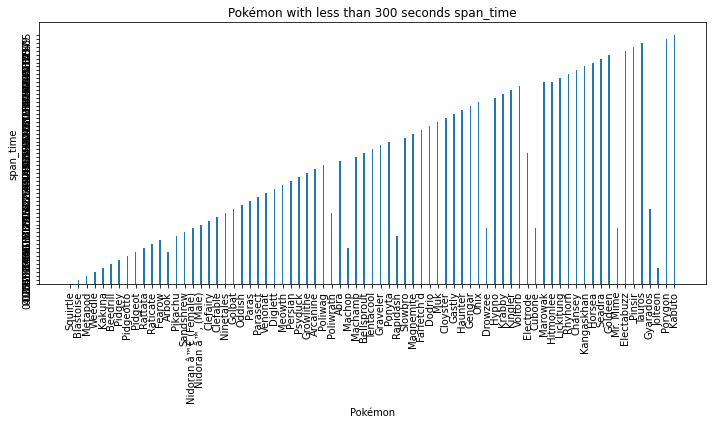

In [90]:
#filter data based on time less than 300 seconds
filter_time = df[df['spawn_time']<'05:00']

#Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(filter_time["name"], filter_time["spawn_time"],width=0.2)
plt.xlabel("Pokémon")
plt.ylabel("span_time")
plt.title("Pokémon with less than 300 seconds span_time")
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()


#### ● Get all Pokemon who have more than two types of capabilities

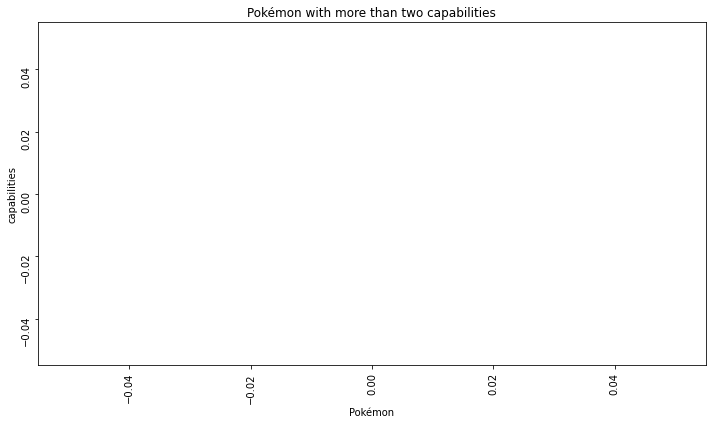

In [120]:
#filter  data based on capabilities which come from type 
capabilities = list(df['type'])
no_of_capabilities = []
for i in range(0,len(capabilities)):
    no_of_capabilities.append(len(capabilities[i][1:-2].split(",")))
   
#add capabilities to dataframe
df['capabilities']=no_of_capabilities 

#filtered data
filter_capabilities = df[df['capabilities']>2]

#Since there is no pokemon who have more than two capabilities so analysis can be follows:

plt.figure(figsize=(10, 6))
plt.bar(filter_capabilities["name"], filter_capabilities["capabilities"],width=0.2)
plt.xlabel("Pokémon")
plt.ylabel("capabilities")
plt.title("Pokémon with more than two capabilities")
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()
